In [2]:
import numpy as np

import matplotlib.pyplot as plt

from scipy import interpolate
from scipy.interpolate import interp1d


a = [   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        , 1406.16666667, 1386.43842365, 1378.07714286,
       1377.45974576, 1372.3097166 , 1366.21153846, 1361.34249471,
       1353.81712062, 1349.99065421, 1347.60513644, 1342.79315068,
       1337.70869033, 1335.45023148, 1333.93130631, 1332.10777778,
       1330.73406593, 1329.73689956, 1328.10966341, 1327.3960177 ,
       1325.74175824, 1324.17007535, 1323.93169691, 1322.59450898,
       1320.95378151, 1319.74364407, 1318.48614072, 1316.99477534,
       1315.78079332, 1314.78645833, 1313.77708333, 1312.99375   ,
       1312.715625  , 1313.65384615, 1316.09241952, 1320.41935484,
       1327.74372385, 1338.39978791, 1346.42607683, 1350.06616729,
       1350.30193237, 1350.50660264, 1350.22864019, 1343.55995204,
       1318.42325056, 1312.656     , 1307.50097847, 1306.40740741,
       1305.42592593, 1305.08763389, 1305.11176471, 1304.12622309,
       1303.93429952, 1303.375     , 1302.64553314, 1302.20191388,
       1302.02759277, 1301.61005693, 1300.97542533, 1300.03487276,
       1299.03665414, 1298.56179775, 1298.51914099, 1298.3697479 ,
       1298.48789572, 1298.21654275, 1298.1122449 , 1298.32962963,
       1298.70157553, 1298.99419167, 1298.26487748, 1317.38349515,
       1336.12784091, 1338.15541401, 1336.89491917, 1336.40463065,
       1337.37103594, 1336.44800777, 1322.17521781, 1308.60187793,
       1302.41873278, 1297.76551095, 1294.46545455, 1293.53581142,
       1293.36133695, 1292.85456188, 1291.50318471, 1289.57103321,
       1288.85767098, 1287.55565949, 1288.18460111, 1289.40447344,
       1288.76829268, 1289.10185185, 1289.13585952, 1289.29340761,
       1290.89502262, 1290.66576087, 1291.60358744, 1292.16532618,
       1291.63390442, 1289.31988743, 1286.12127045, 1280.52435233,
       1275.86898096, 1273.88304862, 1294.17697842, 1344.97916667,
       1347.58188153, 1337.88787185, 1332.49369544, 1328.09848485,
       1323.41791045, 1315.89013035, 1303.19066148, 1294.51674641,
       1290.70140845, 1287.47891284, 1285.60771402, 1284.76763876,
       1283.90719697, 1282.59462056, 1281.97373541, 1280.87524752,
       1279.11055276, 1278.48629442, 1279.25806452, 1280.94236926,
       1281.72454448, 1281.9030837 , 1284.81560284, 1286.17861635,
       1287.0246238 , 1286.79673591, 1290.885     , 1292.1377551 ,
       1294.40847458, 1295.62521891, 1295.58565737, 1300.01927195,
       1302.4832636 , 1304.61995754, 1306.46111111, 1309.45266272,
       1315.07118644, 1320.62727273, 1323.96732026, 1332.31531532,
       1357.91304348, 1376.77272727, 1382.41085271, 1380.24409449,
       1380.15384615, 1382.625     , 1391.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ]

b = [   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        , 1399.        , 1386.07653061, 1376.3006135 ,
       1375.19114688, 1371.30970149, 1365.20305677, 1358.41176471,
       1352.42307692, 1350.91856061, 1346.9046875 , 1341.54082999,
       1337.18046972, 1335.32790698, 1334.00789177, 1332.09222222,
       1330.62816282, 1329.80263158, 1328.19759825, 1327.2989011 ,
       1326.0738699 , 1324.81015453, 1323.68811341, 1322.67089947,
       1320.95693277, 1319.31818182, 1317.97791798, 1316.91954023,
       1315.88321168, 1314.83645833, 1313.91666667, 1312.86145833,
       1312.43645833, 1313.29136316, 1315.94496366, 1320.41311134,
       1327.97703549, 1338.4941302 , 1346.0800464 , 1350.70229008,
       1350.4263285 , 1350.43546441, 1350.24637681, 1343.42753623,
       1319.12302483, 1311.71356784, 1307.37536657, 1306.31871345,
       1305.51996105, 1305.17492711, 1304.88378906, 1304.19941349,
       1303.69729207, 1303.1194605 , 1302.06859903, 1301.99328859,
       1302.128327  , 1301.67772512, 1301.07088847, 1300.32737535,
       1299.48876404, 1298.8636788 , 1298.51633987, 1298.45284781,
       1298.19421102, 1297.94594595, 1297.68994413, 1297.73463687,
       1298.00839552, 1298.44965787, 1299.01736111, 1316.79679803,
       1335.88983051, 1337.79145729, 1336.93949772, 1336.43640351,
       1337.58315789, 1335.7020649 , 1321.48927875, 1308.02830189,
       1302.39210285, 1297.31868132, 1293.57051282, 1292.60821918,
       1292.36429872, 1291.91803279, 1290.79761905, 1289.71178637,
       1289.91948765, 1288.79667283, 1288.53382762, 1289.72516249,
       1288.87160262, 1288.89023256, 1288.27399814, 1288.90046948,
       1291.17090909, 1291.20540541, 1291.09189189, 1291.61185984,
       1291.52213189, 1289.58527493, 1286.78119002, 1280.93117831,
       1276.78941441, 1274.88582677, 1291.6380814 , 1340.97986577,
       1345.99300699, 1337.9191344 , 1332.36062378, 1327.417383  ,
       1322.25992439, 1315.84859813, 1303.38341463, 1293.0745098 ,
       1290.60471698, 1287.16823308, 1285.0879017 , 1284.90225564,
       1283.87464387, 1282.57722008, 1281.9104187 , 1281.80215475,
       1279.30040323, 1278.8622449 , 1279.51685393, 1280.909375  ,
       1281.94498382, 1281.75862069, 1283.88361045, 1285.90147783,
       1284.98580645, 1286.5881459 , 1289.90429043, 1292.32465278,
       1296.63636364, 1296.74535316, 1295.56363636, 1299.59429825,
       1302.675     , 1306.09772727, 1306.60949868, 1311.03072626,
       1315.14696486, 1321.59375   , 1325.03401361, 1334.11764706,
       1355.0375    , 1375.01333333, 1384.11504425, 1376.04672897,
       1374.38202247, 1372.73684211,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ]

c = [   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        , 1402.        , 1384.34517766, 1376.98314607,
       1376.04621849, 1372.18664047, 1366.36757991, 1359.47306792,
       1352.9757085 , 1349.09126214, 1346.62787136, 1341.76725304,
       1337.35599506, 1335.58391608, 1333.67832957, 1332.05333333,
       1330.65600882, 1329.57894737, 1328.2557377 , 1326.60792952,
       1325.67216722, 1323.69858542, 1323.02159827, 1322.51113468,
       1320.95178197, 1319.65079365, 1318.28237792, 1316.90073145,
       1315.61899791, 1314.67604167, 1313.72992701, 1312.96016771,
       1312.47653806, 1313.51817238, 1315.95119418, 1320.4516129 ,
       1327.84326019, 1338.16595745, 1345.6812933 , 1349.40302267,
       1349.92874693, 1350.0496368 , 1349.76242424, 1343.14234017,
       1318.27815315, 1311.81626506, 1307.22722821, 1306.09970674,
       1305.43469786, 1305.21477162, 1305.00782779, 1304.35449219,
       1303.76714976, 1303.37788462, 1302.92233941, 1302.41204589,
       1302.22528517, 1301.66129032, 1301.00756859, 1300.04811321,
       1299.0056444 , 1298.38215962, 1298.03286385, 1298.19194757,
       1298.0121609 , 1297.72268908, 1297.63314711, 1297.71787709,
       1298.23184358, 1299.04085603, 1295.59200969, 1317.16830467,
       1336.02706553, 1337.63068921, 1336.52219626, 1336.01327434,
       1337.49261603, 1335.90989226, 1321.68652344, 1308.09915014,
       1302.27297794, 1297.49404216, 1293.48897059, 1292.57822507,
       1292.43026436, 1291.41063245, 1290.79560037, 1288.89405204,
       1288.27348837, 1288.75138632, 1288.27973978, 1289.28518519,
       1289.31290622, 1289.33736059, 1288.15858209, 1288.48459384,
       1290.22752294, 1291.02079566, 1291.4140414 , 1292.01886792,
       1291.2175884 , 1288.63152985, 1286.48854962, 1280.3960499 ,
       1275.7720504 , 1274.31571995, 1294.47533632, 1343.26605505,
       1346.61391304, 1338.14171429, 1332.65039062, 1327.96374046,
       1322.47393365, 1315.56873823, 1303.30889541, 1294.01645692,
       1290.3844697 , 1287.4713615 , 1285.56415094, 1285.10902256,
       1284.01515152, 1282.77071291, 1282.36354776, 1280.38652131,
       1279.24874119, 1279.58829465, 1280.15789474, 1281.46960168,
       1282.65809218, 1281.96432553, 1284.52969121, 1285.39268293,
       1286.29139073, 1286.65553869, 1289.00327869, 1292.40102389,
       1296.17495396, 1296.87148594, 1295.87169043, 1298.75925926,
       1301.7537797 , 1304.58552632, 1305.29041096, 1309.47109827,
       1313.2755102 , 1316.44285714, 1323.16025641, 1332.97087379,
       1349.7029703 , 1371.87234043, 1379.88235294, 1372.87368421,
       1382.11111111, 1378.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ]

a = np.array(a)
b = np.array(b)
c = np.array(c)

n = 3
linfit = interp1d(list(np.linspace(1,n*10,3)), np.vstack([a, b, c]), axis=0)

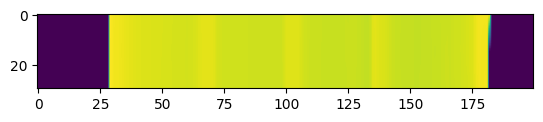

In [11]:

# save the interpolated data
interpolated = linfit(np.linspace(1,n*10,n*10))

plt.imshow(interpolated)



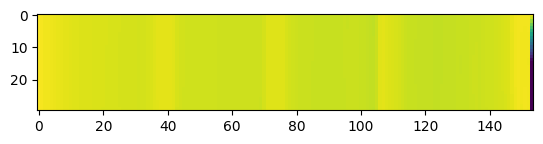

In [31]:
import numpy as np
from stl import mesh


